## LAB 5
## CS22B1082
## Thallapally Nimisha

## Question 1

- MNIST dataset compression and reconstruction using PCA and AutoEncoder.<br>
- Train a PCA model to compress the digits to 4 dimensional latent vectors.<br>
- Train an AutoEncoder model to compress the digits to 4 dimensional latent vectors.<br>
- Visualize the latent vectors using TSNE for both the cases.<br>
- Show reconstruction for 20 latent samples using both models.<br>
- What is the compression ratio achieved?<br>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

2025-03-05 20:33:17.700232: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-05 20:33:17.717017: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741186997.736605   15971 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741186997.742501   15971 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-05 20:33:17.762961: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

### Load MNIST Dataset

In [2]:
# Load MNIST dataset from Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Normalise Pixel Values

In [3]:
# Normalize the images (scale pixel values between 0 and 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the images (28x28 -> 784)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

### PCA Model to Compress Digits to 4D Latent Vectors

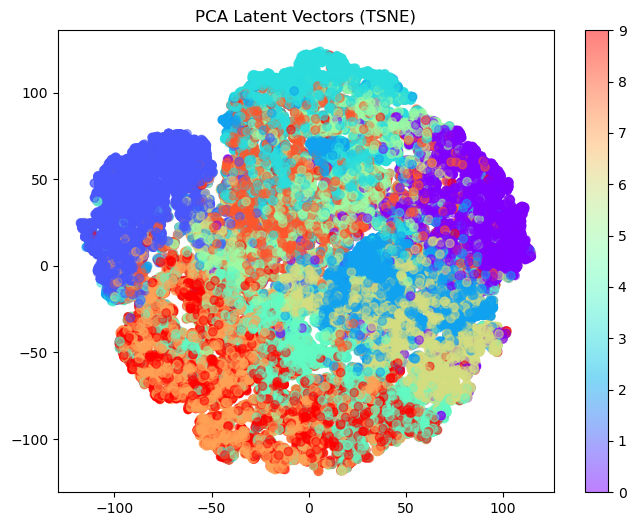

In [4]:
# Perform PCA on the data to reduce it to 4 dimensions
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualize the 4D latent vectors using TSNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train[:len(X_train_tsne)], cmap='rainbow', alpha=0.5)
plt.colorbar()
plt.title("PCA Latent Vectors (TSNE)")
plt.show()

#### Reconstruction from PCA Latent Vectors

In [5]:
# Reconstruct the digits from the 4D latent space
X_train_reconstructed = pca.inverse_transform(X_train_pca)
X_test_reconstructed = pca.inverse_transform(X_test_pca)

# Show 20 reconstructed images
# fig, axes = plt.subplots(2, 10, figsize=(15, 3))
# for i in range(20):
#     ax = axes[i//10, i%10]
#     ax.imshow(X_test_reconstructed[i].reshape(28, 28), cmap='gray')
#     ax.axis('off')
# plt.show()

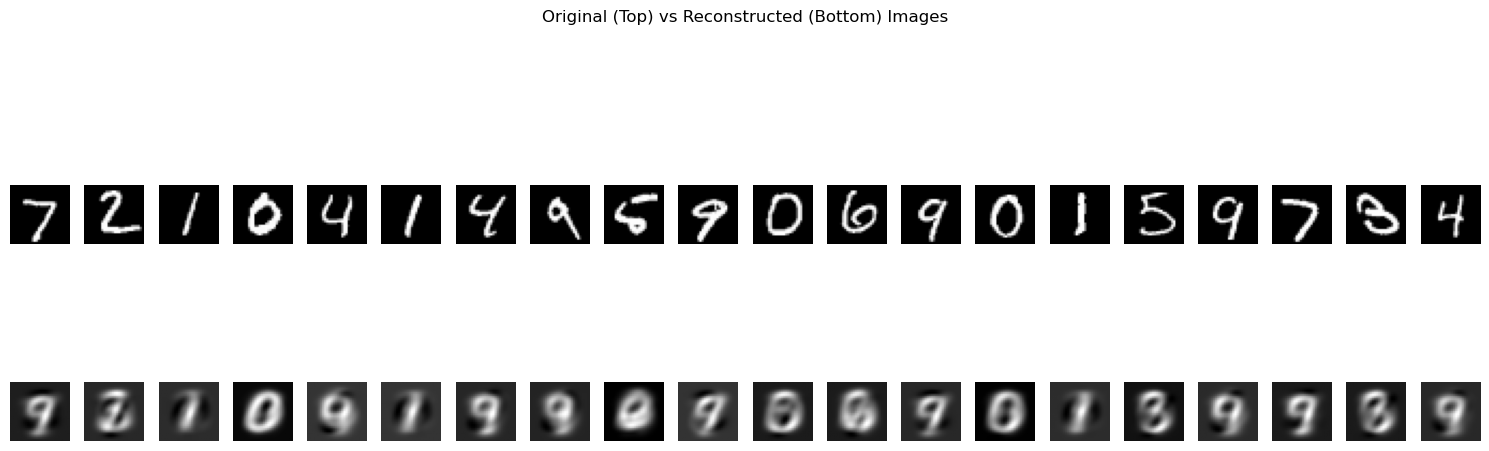

In [6]:
import matplotlib.pyplot as plt

# Show 20 original vs reconstructed images (original on top, reconstructed on bottom)
fig, axes = plt.subplots(2, 20, figsize=(15, 6))

# Plot original images in the first row
for i in range(20):
    ax = axes[0, i]
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')  # Original image
    ax.axis('off')  # Hide the axis
    # ax.set_title(f'Original {i+1}')

# Plot reconstructed images in the second row
for i in range(20):
    ax = axes[1, i]
    ax.imshow(X_test_reconstructed[i].reshape(28, 28), cmap='gray')  # Reconstructed image
    ax.axis('off')  # Hide the axis
    # ax.set_title(f'Reconstructed {i+1}')
    
plt.suptitle("Original (Top) vs Reconstructed (Bottom) Images")
plt.tight_layout()
plt.show()


#### AutoEncoder Model to Compress Digits to 4D Latent Vectors

In [7]:
# Define the AutoEncoder architecture
input_img = Input(shape=(784,))
encoded = Dense(1000, activation='relu')(input_img)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(250, activation='relu')(encoded)
encoded = Dense(4, activation='relu')(encoded)  # Latent space with 4 dimensions
decoded = Dense(250, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(1000, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)  # Encoder model for extracting latent vectors

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


I0000 00:00:1741187233.560286   15971 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2281 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [8]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 250)            │         1,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 500)            │       125,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1000)           │       501,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │       784,784 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,824,288 (10.77 MB)

 Trainable params: 2,824,288 (10.77 MB)

 Non-trainable params: 0 (0.00 B)

### Train the Autoencoder

In [9]:
# Train the AutoEncoder
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=8, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/20


I0000 00:00:1741187237.621218   16351 service.cc:148] XLA service 0x7cb8b8004e60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741187237.621262   16351 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-03-05 20:37:17.686998: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741187238.173189   16351 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-05 20:37:19.858306: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_292', 204 bytes spill stores, 204 bytes spill loads

2025-03-05 20:37:21.040548: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_327

  30/7500 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - loss: 0.4982     

I0000 00:00:1741187250.489276   16351 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7500/7500 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - loss: 0.2126 - val_loss: 0.1570
Epoch 2/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - loss: 0.1532 - val_loss: 0.1492
Epoch 3/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - loss: 0.1473 - val_loss: 0.1472
Epoch 4/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - loss: 0.1443 - val_loss: 0.1437
Epoch 5/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - loss: 0.1425 - val_loss: 0.1430
Epoch 6/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - loss: 0.1412 - val_loss: 0.1428
Epoch 7/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - loss: 0.1398 - val_loss: 0.1412
Epoch 8/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - loss: 0.1393 - val_loss: 0.1419
Epoch 9/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - loss: 0.1385 - val_loss: 0.1409
Epoch 10/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - loss: 0.1378 - val_loss: 0.1401
Epoch 11/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - loss: 0.1372 - val_loss: 0.1389
Epoch 12/20
7500/7500 ━━━━━━━━

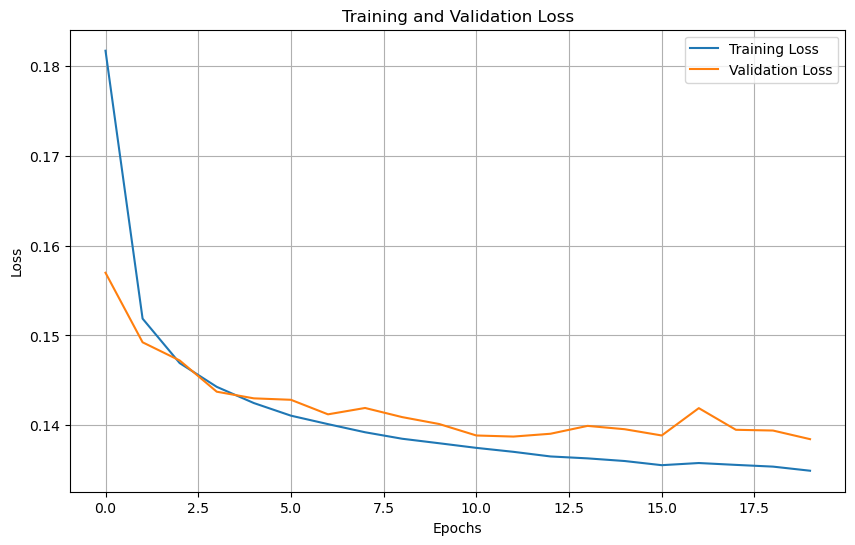

In [10]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Get the latent vectors from the encoder
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

2025-03-05 20:50:03.393993: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_18', 236 bytes spill stores, 236 bytes spill loads

2025-03-05 20:50:03.963799: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_18', 408 bytes spill stores, 444 bytes spill loads

2025-03-05 20:50:04.886443: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_25', 112 bytes spill stores, 112 bytes spill loads

2025-03-05 20:50:04.944825: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_25', 64 bytes spill stores, 64 bytes spill loads



1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
290/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

2025-03-05 20:50:12.769185: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_18', 220 bytes spill stores, 228 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


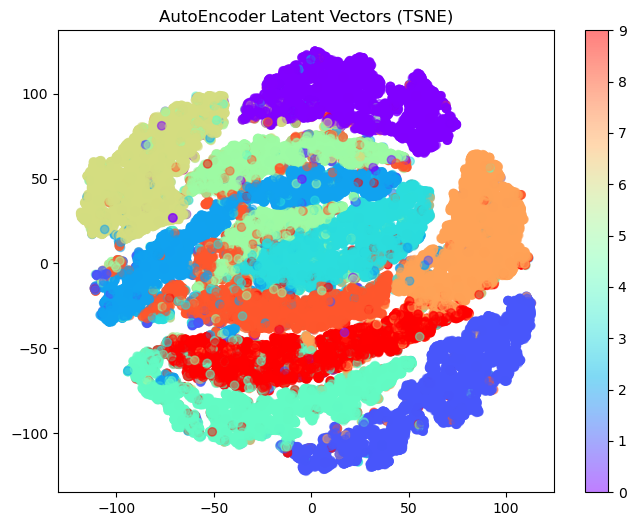

In [12]:
# Visualize the 4D latent vectors using TSNE
X_train_tsne_autoencoder = TSNE(n_components=2, random_state=42).fit_transform(X_train_encoded)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne_autoencoder[:, 0], X_train_tsne_autoencoder[:, 1], c=y_train[:len(X_train_tsne_autoencoder)], cmap='rainbow', alpha=0.5)
plt.colorbar()
plt.title("AutoEncoder Latent Vectors (TSNE)")
plt.show()


### Reconstruction from AutoEncoder Latent Vectors

In [13]:
# Reconstruct the digits from the 4D latent space
X_train_reconstructed_autoencoder = autoencoder.predict(X_train)
X_test_reconstructed_autoencoder = autoencoder.predict(X_test)

# Show 20 reconstructed images from AutoEncoder
# fig, axes = plt.subplots(2, 10, figsize=(15, 3))
# for i in range(20):
#     ax = axes[i//10, i%10]
#     ax.imshow(X_test_reconstructed_autoencoder[i].reshape(28, 28), cmap='gray')
#     ax.axis('off')
# plt.show()

2025-03-05 20:54:16.157788: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_54', 372 bytes spill stores, 404 bytes spill loads

2025-03-05 20:54:16.466521: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_61', 396 bytes spill stores, 432 bytes spill loads

2025-03-05 20:54:16.517628: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_68', 236 bytes spill stores, 236 bytes spill loads

2025-03-05 20:54:16.621568: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_68_0', 264 bytes spill stores, 264 bytes spill loads

2025-03-05 20:54:16.879629: I external/local_xla/xla/strea

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
306/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

2025-03-05 20:54:26.248716: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_61', 208 bytes spill stores, 208 bytes spill loads

2025-03-05 20:54:26.551936: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_54', 180 bytes spill stores, 180 bytes spill loads

2025-03-05 20:54:26.845514: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_68', 220 bytes spill stores, 228 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


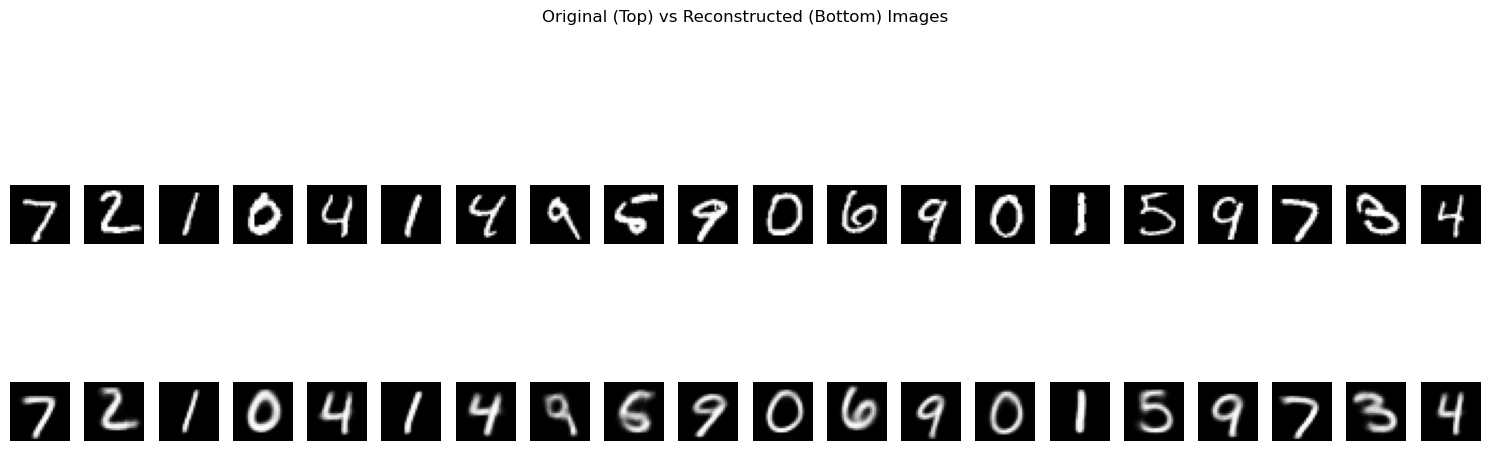

In [14]:
import matplotlib.pyplot as plt

# Show 20 original vs reconstructed images (original on top, reconstructed on bottom)
fig, axes = plt.subplots(2, 20, figsize=(15, 6))

# Plot original images in the first row
for i in range(20):
    ax = axes[0, i]
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')  # Original image
    ax.axis('off')  # Hide the axis
    # ax.set_title(f'Original {i+1}')

# Plot reconstructed images in the second row
for i in range(20):
    ax = axes[1, i]
    ax.imshow(X_test_reconstructed_autoencoder[i].reshape(28, 28), cmap='gray')  # Reconstructed image
    ax.axis('off')  # Hide the axis
    # ax.set_title(f'Reconstructed {i+1}')

plt.suptitle("Original (Top) vs Reconstructed (Bottom) Images")
plt.tight_layout()
plt.show()


### Calculate the Compression Ratio

In [15]:
# Define original size (784 for MNIST, as each image is 28x28 pixels)
original_size = 784

# For PCA, the number of features after compression is 4
compressed_size_pca = 4
compression_ratio_pca = original_size / compressed_size_pca
print(f"Compression Ratio for PCA: {compression_ratio_pca}")

# For AutoEncoder, the number of features after compression is also 4
compressed_size_autoencoder = 4
compression_ratio_autoencoder = original_size / compressed_size_autoencoder
print(f"Compression Ratio for AutoEncoder: {compression_ratio_autoencoder}")


Compression Ratio for PCA: 196.0
Compression Ratio for AutoEncoder: 196.0
